# Setting enviroment

In [39]:
# Libraries
import pandas as pd
import os
import json
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading kaggle credentials
with open('kaggle.json') as jsonfile:
    cred = json.load(jsonfile)

In [7]:
# Kaggle credentials
os.environ['KAGGLE_USERNAME'] = cred['username']
os.environ['KAGGLE_KEY'] = cred['key']

# Importing data

In [8]:
# Donwloading data
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

100%|████████████████████████████████████████| 397k/397k [00:00<00:00, 1.29MB/s]
100%|████████████████████████████████████████| 397k/397k [00:00<00:00, 1.29MB/s]


In [14]:
# Unziping data
with ZipFile('suicide-rates-overview-1985-to-2016.zip', 'r') as zf:
    zf.extractall()
    print('Done')

Done


In [105]:
# Importing as df
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Initial exploration

The statistic unit is country-year-sex, so we need to analyze the data taking in count this.

In [31]:
# Data dimensionality and variable types
print(df.dtypes, '\n', '\n', df.shape)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object 
 
 (27820, 12)


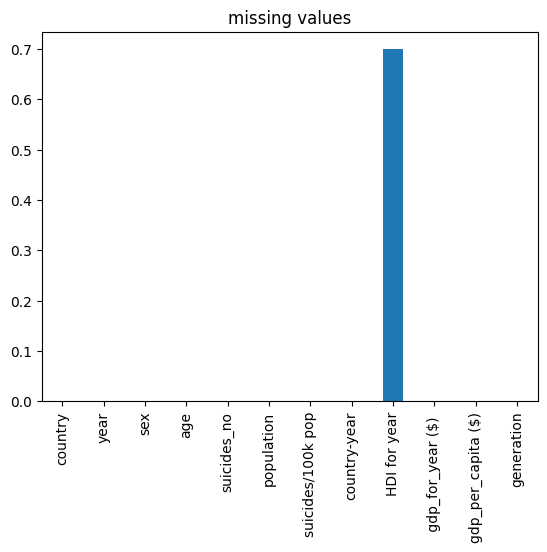

In [100]:
# Missing values
df.isnull().mean().plot(kind='bar')
plt.title('missing values')
plt.show()

<Axes: xlabel='country'>

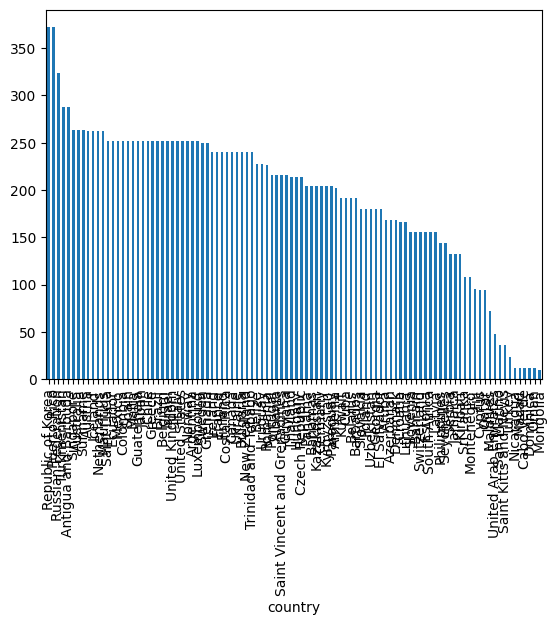

In [106]:
# Missing values per country
df[df['HDI for year'].isnull()]['country'].value_counts().plot(kind='bar')
plt.xticks